<a href="https://colab.research.google.com/github/Manav-Gupta/pulsar-detection/blob/main/pulsar_star_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mounting the drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import keras
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import Adam
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score

In [4]:
# reading the dataset
df=pd.read_csv('drive/My Drive/HTRU_2.csv')
df.head(5)

,140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


In [5]:
# renaming the columns
df.columns=[' Mean of the integrated profile',' Standard deviation of the integrated profile',' Excess kurtosis of the integrated profile',' Skewness of the integrated profile',' Mean of the DM-SNR curve',' Standard deviation of the DM-SNR curve',' Excess kurtosis of the DM-SNR curve',' Skewness of the DM-SNR curve','target_class']

In [6]:
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
...,...,...,...,...,...,...,...,...,...
17892,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17893,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17894,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17895,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [7]:
df=df[[' Mean of the integrated profile',' Standard deviation of the integrated profile',' Excess kurtosis of the integrated profile',' Skewness of the integrated profile',' Mean of the DM-SNR curve',' Standard deviation of the DM-SNR curve',' Excess kurtosis of the DM-SNR curve',' Skewness of the DM-SNR curve','target_class']]
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
...,...,...,...,...,...,...,...,...,...
17892,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17893,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17894,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17895,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [8]:
#Deleting the rows containing NaN values
df=df.dropna()

In [9]:
#Creating the feature test set
df1= df.drop(['target_class'],axis=1)

In [10]:
#Creating the target test set
df2= df['target_class'].values

In [11]:
#Scaling data
scale_x = MinMaxScaler(feature_range=(0,1))
scaled_x=scale_x.fit_transform(df1)
print(scaled_x.shape)
df2=df2.reshape(-1, 1)
scale_y = MinMaxScaler(feature_range=(0,1))
scaled_y=scale_y.fit_transform(df2)
print(scaled_y.shape)
print(scaled_x)

(17897, 8)
(17897, 1)
[[0.51762787 0.46090841 0.23541516 ... 0.0725243  0.36401483 0.10844339]
 [0.52034628 0.19686832 0.22113842 ... 0.13918843 0.28862387 0.05461031]
 [0.70093263 0.43788377 0.18174959 ... 0.13158337 0.26634832 0.04658145]
 ...
 [0.60771193 0.4751437  0.2046521  ... 0.49869934 0.14965285 0.00550903]
 [0.58186609 0.39361695 0.20885482 ... 0.05820853 0.34892638 0.11418141]
 [0.27435072 0.82458965 0.33003783 ... 0.5552546  0.04091771 0.00285542]]


In [12]:
#Converting data into readable format of LSTM for previous 100 timesteps
x=list()
y=list()
ws=100
for i in range(len(df)-ws):
  xx=list()
  for j in range(0,ws-1,1):
    value=scaled_x[i+j]
    xx.append(value)
  x.append(xx)
  yy=scaled_y[i+ws-1]
  y.append(yy)
#Input of  LSTM 
x=np.array(x)
#Output of LSTM
y=np.array(y)
print(x.shape)

(17797, 99, 8)


In [13]:
#Splitting data into training 70% , testing 15% and validation 15%
n_train_hours = 12493
n_valid_hours = 15170
train_x = x[:n_train_hours]
test_x = x[n_valid_hours:]
valid_x= x[n_train_hours:n_valid_hours]
train_y = y[:n_train_hours]
test_y = y[n_valid_hours:]
valid_y= y[n_train_hours:n_valid_hours]

Epoch 1/300
13/13 [==============================] - 10s 585ms/step - loss: 1.4525e-08 - val_loss: 4.8093e-09
Epoch 2/300
13/13 [==============================] - 7s 539ms/step - loss: 1.4525e-08 - val_loss: 4.8093e-09
Epoch 3/300
13/13 [==============================] - 7s 535ms/step - loss: 1.4525e-08 - val_loss: 4.8093e-09
Epoch 4/300
13/13 [==============================] - 7s 531ms/step - loss: 1.4525e-08 - val_loss: 4.8093e-09
Epoch 5/300
13/13 [==============================] - 7s 529ms/step - loss: 1.4525e-08 - val_loss: 4.8093e-09
Epoch 6/300
13/13 [==============================] - 7s 543ms/step - loss: 1.4525e-08 - val_loss: 4.8093e-09
Epoch 7/300
13/13 [==============================] - 7s 534ms/step - loss: 1.4525e-08 - val_loss: 4.8093e-09
Epoch 8/300
13/13 [==============================] - 7s 542ms/step - loss: 1.4525e-08 - val_loss: 4.8093e-09
Epoch 9/300
13/13 [==============================] - 7s 537ms/step - loss: 1.4525e-08 - val_loss: 4.8093e-09
Epoch 10/300
13/13

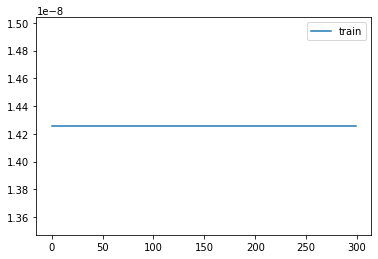

In [14]:
#Declaration of model
model = Sequential()
#adding LSTM layer
model.add(LSTM(64, input_shape=(9,8),kernel_initializer='truncated_normal'))
model.add(Dense(1,activation='linear'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001))
#Training the model
history = model.fit(train_x, train_y, epochs=300, batch_size=1000, validation_data=(valid_x, valid_y), verbose=1, shuffle=False)
#Plotting the loss graphs
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

In [17]:
#Rescaling the data 
import sklearn.metrics as metrics
yhat = model.predict(test_x)

inv_yhat = scale_y.inverse_transform(yhat)

inv_y = scale_y.inverse_transform(test_y)

#Finding the accuracy with RMSE function
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.144
